In [0]:
# use following command to make colab connect google drive
#The maximum lifetime of a Colab VM is 12 hours.
!dpkg --configure -a
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:

import itertools
import os
import json

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# use bow model to process imdb dataset
def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
# x_test = vectorize_sequences(test_data)

In [0]:
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
#load the json data
data_path = '/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/'
data_exist=os.path.exists(data_path)
paragraphs = list()
labels = list()
if data_exist:
  print('Data exist')
  file_names = os.listdir(data_path)
  for i in range(len(file_names)):
      print(file_names[i])
      file_path = data_path+file_names[i]
      print(file_path)
      with open(file_path,encoding="utf8", errors='ignore') as f:
        data = json.load(f)
        for item in data['text'].values():
          paragraphs.append(item)

        for item in data['sentiment'].values():
          if item =="negative":
            labels.append(0)
          elif item == "positive":
            labels.append(1)
          else:
            labels.append(1)

Data exist
Team10_NVIDIA.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team10_NVIDIA.json
Team3_Facebook.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team3_Facebook.json
Team6_Tesla.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team6_Tesla.json
Team5_Microsoft.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team5_Microsoft.json
Team12_Chevron.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team12_Chevron.json
Team2_Amazon.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team2_Amazon.json
Team7_Walmart.json
/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/data/Team7_Walmart.json
Team11_Boeing.json
/c

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
# use bow model
tokenize.fit_on_texts(paragraphs) # only fit on train
x_test = tokenize.texts_to_matrix(paragraphs)

In [0]:
# Our vectorized labels
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(labels).astype('float32')

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(labels)

# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [8]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000, 1000)
x_test shape: (1644, 1000)
y_train shape: (25000, 2)
y_test shape: (1644, 2)


In [0]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# tweaking these hyperparamaters when using this model with  data
batch_size = 512
epochs = 10

In [10]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 2s 87us/step - loss: 0.4549 - acc: 0.7797 - val_loss: 0.3480 - val_acc: 0.8516
Epoch 2/10
22500/22500 [==============================] - 2s 77us/step - loss: 0.3230 - acc: 0.8648 - val_loss: 0.3340 - val_acc: 0.8544
Epoch 3/10
22500/22500 [==============================] - 2s 77us/step - loss: 0.2912 - acc: 0.8780 - val_loss: 0.3306 - val_acc: 0.8644
Epoch 4/10
22500/22500 [==============================] - 2s 77us/step - loss: 0.2661 - acc: 0.8923 - val_loss: 0.3392 - val_acc: 0.8624
Epoch 5/10
22500/22500 [==============================] - 2s 77us/step - loss: 0.2352 - acc: 0.9044 - val_loss: 0.3372 - val_acc: 0.8640
Epoch 6/10
22500/22500 [==============================] - 2s 76us/step - loss: 0.2069 - acc: 0.9195 - val_loss: 0.3419 - val_acc: 0.8624
Epoch 7/10
22500/22500 [==============================] - 2s 76us/step - loss: 0.

In [12]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1644/1644 [==============================] - 0s 32us/step
Test score: 1.152037375744822
Test accuracy: 0.5079075431591693


In [0]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 
# for i in range(10):
#     prediction = model.predict(np.array([x_test[i]]))
#     predicted_label = text_labels[np.argmax(prediction)]
#     print(test_paragraphs.iloc[i][:50], "...")
#     print('Actual label:' + test_label.iloc[i])
#     print("Predicted label: " + predicted_label + "\n")

In [0]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

Confusion matrix, without normalization
[[ 56  62]
 [747 779]]


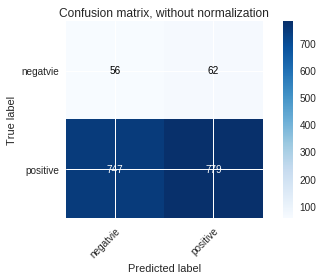

In [15]:
# calculate and print the confusion matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


class_names = ['negatvie','positive']
# class_names = ['positive','neutral','negatvie']

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_1d, y_pred_1d, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(df['orginal_label'], df['scores'], classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
